## **Анализ маркетинговых показателей**

# Задача: Провести анализ одного из реальных источников данных, используя Python и соответствующие библиотеки для анализа данных.

In [ ]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
pd.set_option('display.max_columns', None) #код, чтобы отобразить все столбцы таблицы

Загрузим файл с данными

Анализ маркетинговых показателей:https://www.kaggle.com/jackdaoud/marketing-data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df (1).csv


In [ ]:
data = pd.read_csv("ifood_df.csv", sep = ',')
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


### 1. Изучим данные и выполним предобработку

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Файл содержит 39 колонок и 2205 строк

In [ ]:
data.columns = data.columns.str.replace(' ', '')  #удалим пробелы в названиях стобцов

Приведем названия столбцов к удобному виду

In [ ]:
data.rename(columns ={'Kidhome':'kids', 'Teenhome':'teen', 'MntWines' :'mnt_wines', 'MntFruits' :'mnt_fruits', 'MntMeatProducts': 'mnt_meat', 'MntFishProducts': 'mnt_fish','MntSweetProducts': 'mnt_sweet', 'MntGoldProds': 'mnt_gold',  'NumDealsPurchases' : 'deals_purchases',  'NumWebPurchases': 'web_purchases', 'NumCatalogPurchases' :'catalog_purcheses', 'NumStorePurchases' :'store_purcheses', 'NumWebVisitsMonth':'web_visits_mnth',  'AcceptedCmp3': 'Cmp3', 'AcceptedCmp4' :'Cmp4' , 'AcceptedCmp5' : 'cmp5', 'AcceptedCmp1': 'cmp1', 'AcceptedCmp2' : 'cmp2', 'Z_CostContact' :'cost_contact', 'Z_Revenue' : 'revenue', 'MntTotal': 'mnt_total', 'MntRegularProds' : 'mnt_regular', 'AcceptedCmpOverall':'cmp_overall'},  inplace=True)
data.head()

,Income,kids,teen,Recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,deals_purchases,web_purchases,catalog_purcheses,store_purcheses,web_visits_mnth,Cmp3,Cmp4,cmp5,cmp1,cmp2,Complain,cost_contact,revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2nCycle,education_Basic,education_Graduation,education_Master,education_PhD,mnt_total,mnt_regular,cmp_overall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


Приведем все названия столбцов к нижнему регистру

In [ ]:
data.columns = data.columns.str.lower() #приведем все названия столбцов к нижнему регистру
data.head(1)

,income,kids,teen,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,deals_purchases,web_purchases,catalog_purcheses,store_purcheses,web_visits_mnth,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cost_contact,revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2ncycle,education_basic,education_graduation,education_master,education_phd,mnt_total,mnt_regular,cmp_overall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0


In [ ]:
data.describe()

,income,kids,teen,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,deals_purchases,web_purchases,catalog_purcheses,store_purcheses,web_visits_mnth,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cost_contact,revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2ncycle,education_basic,education_graduation,education_master,education_phd,mnt_total,mnt_regular,cmp_overall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


По данным видим, что ничего подозрительно нет. Много колонок с данными, заполненными 0 и 1. Можно было бы использовать булевый тип данных, но пока нет критичности, оставим как есть.

Низкие значения стандартного отклонения говорят нам о том (например, kids, teens, deals_purchases), что отдельные значения ближе к среднему. С другой стороны, высокие значения говорят нам о том, что отдельные наблюдения далеки от среднего значения данных(income, mnt_meat, mnt_wines).


В столбце mnt_regular видим отрицательный минимум. Это может быть ошибка, но может быть и возврат товара. Удалять не будем. Проверим сколько таких строк

In [ ]:
data.query("mnt_regular < 0")

,income,kids,teen,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,deals_purchases,web_purchases,catalog_purcheses,store_purcheses,web_visits_mnth,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cost_contact,revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2ncycle,education_basic,education_graduation,education_master,education_phd,mnt_total,mnt_regular,cmp_overall
1307,6560.0,0,0,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,3,11,0,38,2358,0,0,1,0,0,0,0,0,1,0,111,-151,0
1780,7144.0,0,2,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,3,11,0,54,2363,0,0,1,0,0,0,0,0,0,1,125,-166,0
1949,4428.0,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,51,2426,0,1,0,0,0,0,0,1,0,0,38,-283,0


В данных три такие строки. Это разные пользователи, судя по возрасту. При этом общая сумма трат имеет положительное значение

Опираясь на таблицу выше, мы можем для всех столбцов узнать значения 1,2,3 квартилей . **Q1 это 25%, Q2 это 50%, что также является медианой, Q3 это 75%. Также здесь есть все значения среднего, минимум,  максимум и стандартное отклонение**

Т.к. на данном этапе мы работаем с генеральной совокупностью, а не с выборкой (мы пока не удалили ни одной строки), можно для вычисления **дисперсии** использовать функцию var библиотеки numpy без применения параметра ddof=1 и даже не использовать модуль statistics в данном случае

In [ ]:
print(data.var())

income                  4.290310e+08
kids                    2.885107e-01
teen                    2.963497e-01
recency                 8.370671e+02
mnt_wines               1.139021e+05
mnt_fruits              1.582805e+03
mnt_meat                4.743009e+04
mnt_fish                3.005741e+03
mnt_sweet               1.691715e+03
mnt_gold                2.676636e+03
deals_purchases         3.557398e+00
web_purchases           7.493489e+00
catalog_purcheses       7.832425e+00
store_purcheses         1.050924e+01
web_visits_mnth         5.825153e+00
cmp3                    6.848937e-02
cmp4                    6.887580e-02
cmp5                    6.771527e-02
cmp1                    6.027919e-02
cmp2                    1.342642e-02
complain                8.992103e-03
cost_contact            0.000000e+00
revenue                 0.000000e+00
response                1.282714e-01
age                     1.370258e+02
customer_days           4.103203e+04
marital_divorced        9.347054e-02
m

Высокая дисперсия income, mnt_wines, mnt_fruits, mnt_meat, mnt_fish, mnt_total, mnt_regular говорит нам о том, что значения в нашем наборе данных далеки от своего среднего. Таким образом, эти данные имеют высокий уровень изменчивости. Низкая дисперсия говорит нам о том, что значения довольно близки к среднему. В этом случае данные будут иметь низкий уровень изменчивости.

Посчитаем **квантили**

In [ ]:
(
    data[['income', 'kids', 'teen', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat', 'mnt_fish', 'mnt_sweet', 'mnt_gold', 'deals_purchases', 'web_purchases', 'catalog_purcheses', 'store_purcheses', 'web_visits_mnth', 'cmp3', 'cmp4', 'cmp5', 'cmp1', 'cmp2', 'complain', 'cost_contact', 'revenue', 'response', 'age', 'customer_days', 'marital_divorced', 'marital_married', 'marital_single', 'marital_together', 'marital_widow', 'education_2ncycle', 'education_basic', 'education_graduation', 'education_master', 'education_phd', 'mnt_total', 'mnt_regular', 'cmp_overall'     ]]
    .quantile([ .1, .9])
    .style.format("{:,.2f}")
)

,income,kids,teen,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,deals_purchases,web_purchases,catalog_purcheses,store_purcheses,web_visits_mnth,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cost_contact,revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2ncycle,education_basic,education_graduation,education_master,education_phd,mnt_total,mnt_regular,cmp_overall
0.100000,"24,045.00",0.00,0.00,9.00,6.00,0.00,7.00,0.00,0.00,3.00,1.00,1.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,36.00,"2,230.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.00,17.00,0.00
0.900000,"79,601.40",1.00,1.00,89.00,823.60,83.00,497.60,121.00,89.00,121.60,5.00,8.00,7.00,11.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,1.00,68.00,"2,793.20",1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,"1,466.60","1,387.60",1.00


Проверим данные на пропуски

In [ ]:
data.isna().sum() #проверим пропуски

income                  0
kids                    0
teen                    0
recency                 0
mnt_wines               0
mnt_fruits              0
mnt_meat                0
mnt_fish                0
mnt_sweet               0
mnt_gold                0
deals_purchases         0
web_purchases           0
catalog_purcheses       0
store_purcheses         0
web_visits_mnth         0
cmp3                    0
cmp4                    0
cmp5                    0
cmp1                    0
cmp2                    0
complain                0
cost_contact            0
revenue                 0
response                0
age                     0
customer_days           0
marital_divorced        0
marital_married         0
marital_single          0
marital_together        0
marital_widow           0
education_2ncycle       0
education_basic         0
education_graduation    0
education_master        0
education_phd           0
mnt_total               0
mnt_regular             0
cmp_overall 

Пропусков не обнаружено

In [ ]:
dupl = data[data.duplicated()] #проверим дубликаты
dupl

,income,kids,teen,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,deals_purchases,web_purchases,catalog_purcheses,store_purcheses,web_visits_mnth,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cost_contact,revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2ncycle,education_basic,education_graduation,education_master,education_phd,mnt_total,mnt_regular,cmp_overall
77,38620.0,0,0,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0,57,2573,0,0,0,1,0,0,0,0,1,0,229,140,0
167,78497.0,0,0,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,3,11,0,69,2369,0,1,0,0,0,1,0,0,0,0,755,532,1
267,51369.0,0,1,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,3,11,0,44,2771,0,0,0,1,0,0,0,1,0,0,394,212,0
268,37760.0,0,0,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0,74,2826,0,0,0,1,0,0,0,1,0,0,289,261,0
346,37717.0,1,0,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,3,11,0,42,2742,0,1,0,0,0,0,0,0,0,1,20,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,1,1,0,2,8,0,0,0,0,0,0,3,11,0,42,2534,0,0,0,1,0,0,0,1,0,0,14,13,0
2188,75777.0,0,0,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1,38,2519,0,0,1,0,0,0,0,0,1,0,1358,1278,2
2192,58554.0,1,1,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,3,11,0,52,2800,0,0,0,1,0,0,0,1,0,0,498,410,0
2199,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,46,2522,0,1,0,0,0,0,0,1,0,0,21,12,0


In [ ]:
dupl = data[data.duplicated()] .count()
filtr = len(dupl) # количесвто дубликатов в таблице
row_count = len (data) # количество строк в таблице
print('Процент дубликатов {:,.3%}'.format(filtr/ row_count))

Процент дубликатов 1.769%


Теоретически, опираясь на малый процент данных, мы можем удалить дублиткаты. Но т.к. мы не имеем четких идентифицирующих пользователя данных, невозможно точно сказать, что это повторы, а не совпадения, и эти данные могут быть полезнымии. Поэтому удалять не будем

Посчитаем количество уникальных значений для каждого столбца

In [ ]:
data.nunique ()

income                  1963
kids                       3
teen                       3
recency                  100
mnt_wines                775
mnt_fruits               158
mnt_meat                 551
mnt_fish                 182
mnt_sweet                176
mnt_gold                 212
deals_purchases           15
web_purchases             15
catalog_purcheses         13
store_purcheses           14
web_visits_mnth           16
cmp3                       2
cmp4                       2
cmp5                       2
cmp1                       2
cmp2                       2
complain                   2
cost_contact               1
revenue                    1
response                   2
age                       56
customer_days            662
marital_divorced           2
marital_married            2
marital_single             2
marital_together           2
marital_widow              2
education_2ncycle          2
education_basic            2
education_graduation       2
education_mast

Посмотрим значения моды

In [ ]:
data.mode()

,income,kids,teen,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,deals_purchases,web_purchases,catalog_purcheses,store_purcheses,web_visits_mnth,cmp3,cmp4,cmp5,cmp1,cmp2,complain,cost_contact,revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2ncycle,education_basic,education_graduation,education_master,education_phd,mnt_total,mnt_regular,cmp_overall
0,7500.0,0.0,0.0,56.0,2.0,0.0,7.0,0.0,0.0,3,1.0,2.0,0.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,44.0,2826.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,16,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN


По 2 моды в столбцах mnt_gold (3, 4) mnt_regular(16, 17). В отстальных столбцах по 1 значению.

##Графики##

Построим графики наличия у покупателей детей и подростков

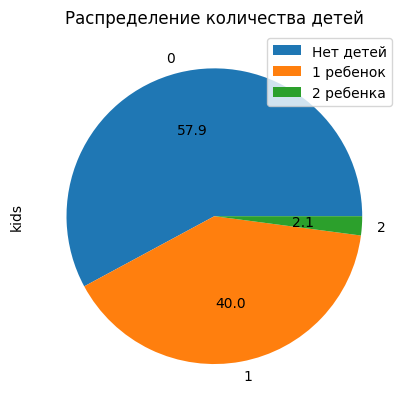

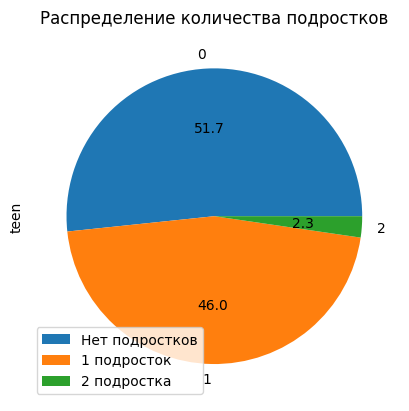

In [ ]:
plt.figure(0)
data['kids'].value_counts().plot(kind='pie', autopct='%.1f')
data_names = ["Нет детей", "1 ребенок", "2 ребенка"]
plt.title ('Распределение количества детей')
plt.legend( labels = data_names )
plt.show()

plt.figure(1)
data['teen'].value_counts().plot(kind='pie', autopct='%.1f')
data_names = ["Нет подростков", "1 подросток", "2 подростка"]
plt.title ('Распределение количества подростков')
plt.legend( labels = data_names )
plt.show()

Построим график зависимости суммы покупок от дохода

In [ ]:
data['income'].corr(data['mnt_total'])

0.8230660021398378

Корреляция положительная, значит при увеличении суммы дохода, увеличивается и сумма покупок

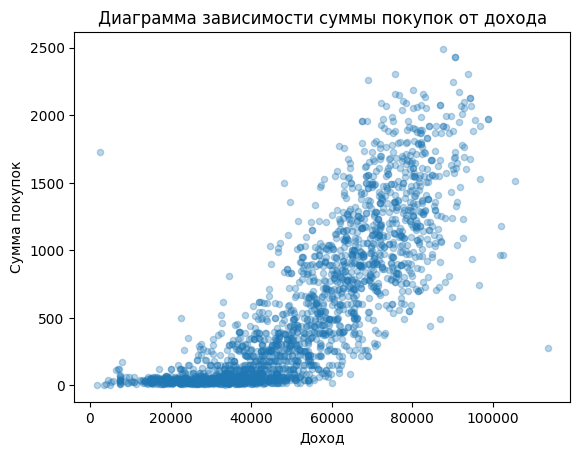

In [ ]:
data.plot(x = 'income', y = 'mnt_total', kind = 'scatter',  alpha = 0.3)
plt.xlabel('Доход')
plt.ylabel('Сумма покупок')
plt.title ('Диаграмма зависимости суммы покупок от дохода')
plt.show()

Подтверждаем на графике

##Проверка гипотез##

Для проверки возьмем такие гипотезы

H0 - Группа среднего возраста совершает такое же число покупок, как группа старшего возраста

H1 - Группы среднего и старшего возраста совершают разное количество покупок

За основу возьмем столбец  с возрастом age и количеством чеков deals_purcheses. Нулевые значения количества чеков отбрасывать не будем, поскольку в данном случае они влияют на реультат.

Поделим всех покупателей на 2 группы.

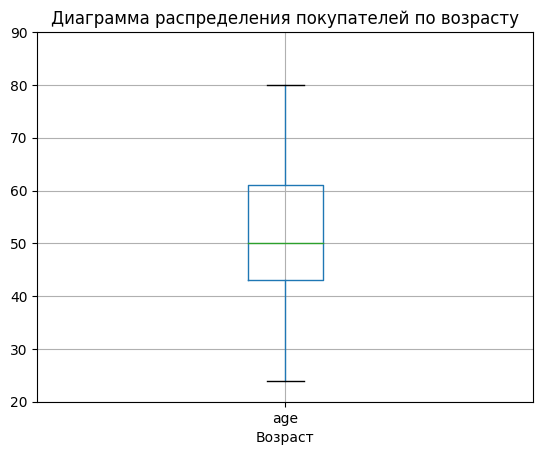

In [ ]:
plt.ylim(20, 90) #выставляем значения по оси у
data.boxplot('age') # строим диаграмму размаха
plt.xlabel('Возраст')
plt.title ('Диаграмма распределения покупателей по возрасту')
plt.show()

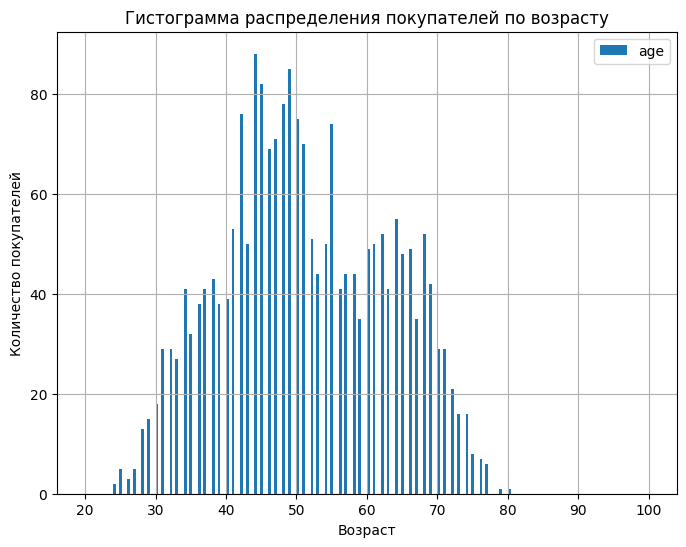

In [ ]:
data.plot(y = 'age', kind = 'hist', bins = 200, grid=True, range = (20,100), figsize = (8,6)) #построим гистограмму
plt.xlabel('Возраст')
plt.ylabel('Количество покупателей')
plt.title ('Гистограмма распределения покупателей по возрасту')
plt.show()

По ящику с усами видим, что медиана ровно на 50ти, выбросов нет. Значения возраста нормально распределены.

Возьмем 50 лет, за показатель деления между группами.

In [ ]:
#Делим датасет на 2 группы df1 младше 50 лет и df2 равно или старше 50 лет
#Создаем датасеты со значениями количества чеков
df1=  data.loc[ (data['age'] < 50)]
df1 = df1[['deals_purchases']].reset_index(drop=True)
df2=  data.loc[ (data['age'] >= 50)]
df2 = df2[['deals_purchases']].reset_index(drop=True )

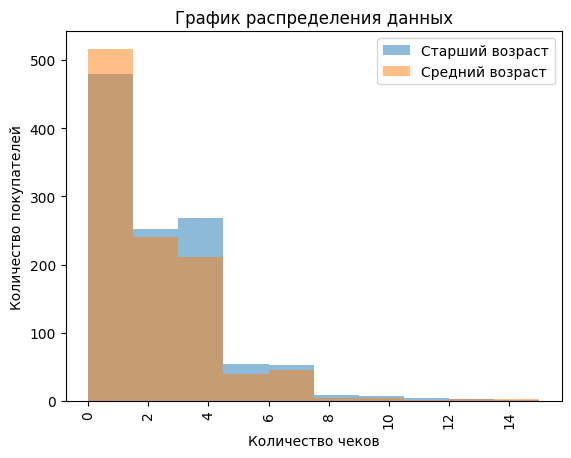

In [ ]:
plt.xlabel('Количество чеков')
plt.ylabel('Количество покупателей')
plt.hist(df2, alpha=0.5)
plt.xticks(rotation='vertical')
plt.hist(df1, alpha=0.5)
plt.xticks(rotation='vertical')
plt.title('График распределения данных')
plt.legend(['Старший возраст', 'Средний возраст'])
plt.show()

По графику видим, что данные **не имеют нормального распределения**

### Метод Шапиро для проверки нормальности распределения дданных ###

H0 - Даннные взяты из нормального распределения

H1 - Данны взяты не из нормального распределения

In [ ]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.7137132883071899, pvalue=2.9344156738902054e-39)
ShapiroResult(statistic=0.7764074206352234, pvalue=9.83263285813641e-37)


Т.к. значение p-value меньше 0,05, отвергает нулевую гипотезу. Подтверждаем, что даннные не распределены нормально.

### Тест Левена ###

Оценка равенства дисперсий

H0 - Дисперсии выборок не имеют значимых раличий

Н1 - Дисперсии выборок имеют значимые различия

In [ ]:
a = df1['deals_purchases'].tolist()
b = df2['deals_purchases'].tolist()

In [ ]:
from scipy.stats import levene
print(levene(a,b))


LeveneResult(statistic=2.198392139669167, pvalue=0.13829780786136317)


Дисперсии наших выборок не имеют значимых различий, т.к. p-value 0,13 = 13% -это больше 5%

### Метод Манна-Уитни###

Поскольку в приведенном выше примере значение p-value меньше альфа-значения (0.05), то мы отвергаем нулевую гипотезу, т. е. выборка получена не из нормального распределения, соответственно проверку гипотез будем осуществлять **методом Манна-Уитни**

In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu (df1, df2, method = "asymptotic")

MannwhitneyuResult(statistic=array([563922.5]), pvalue=array([0.00230338]))

Значение p-value очень меньше 0.05, соответственно нулевую гипотезу отвергаем. т.е. группы среднего и старшего возраста совершают разное количество покупок.